# Installing and importing packages

In [82]:
#pip install -U sentence-transformers

In [83]:
#pip show sentence_transformers

In [84]:
import bs4 as bs
import urllib.request
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.word2vec import Word2Vec

In [85]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hashim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hashim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hashim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Code for reading pdf files

In [86]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)

    text = ""
    for page_number in range(doc.page_count):
        page = doc[page_number]
        text += page.get_text()

    doc.close()
    return text

# Replace 'your_file.pdf' with the actual path to your PDF file
pdf_path = 'C:\\Users\\Hashim\\Downloads\\63a5bc2076dc2e1eb8aee4e3_Innovating Cyber Recovery - Key to Cyber Resilience.pdf'
extracted_text = extract_text_from_pdf(pdf_path)
#sentences = extracted_text
# print(extracted_text)


# Code for reading text from a webpage

In [87]:
scraped_data = urllib.request.urlopen('https://www.healthline.com/health/cancer#treatment')
article = scraped_data.read()

In [88]:
article

b'<!DOCTYPE html><html lang="en"><head>\n<link rel=preload href="https://assets.healthline.com/_next/vendor-fd790-legacy.js" as=script crossorigin=anonymous><link rel=preload href="https://assets.healthline.com/_next/lib-9d57e-legacy.js" as=script crossorigin=anonymous><link rel=preload href="https://assets.healthline.com/_next/cc64080e-5dc3-4a82-b6be-f3165ff7e463/hl/pages/tabbed.js-legacy.js" as=script crossorigin=anonymous>\n<title>Cancer: Types, Causes, Treatment, and Prevention</title><link rel="canonical" href="https://www.healthline.com/health/cancer"/><meta name="description" content="Cancer is a group of diseases that occur when abnormal cells divide rapidly and spread. Learn the types, causes, treatments, and prevention methods."/><meta name="keywords" content="cancer symptoms, cancer treatments"/><meta name="k1" content="othercancers"/><meta name="k2" content="cancer"/><meta name="ROBOTS" content="NOODP"/><meta name="sailthru.image.thumb" content="https://media.post.rvohealth

In [89]:
parsed_article = bs.BeautifulSoup(article,'lxml')
#parsing and finding paragraph tags alone
paragraphs = parsed_article.find_all('p')

sentences = ""
for p in paragraphs:
    sentences += p.text

In [90]:
sentences

'Cancer occurs when genetic mutations in abnormal cells cause them to divide rapidly. You can inherit mutations or develop them due to environmental factors. Cancer is a large group of diseases that occur when abnormal cells divide rapidly and can spread to other tissue and organs.These rapidly growing cells may cause tumors. They may also disrupt the body’s regular function.Cancer is one of the leading causes of death in the world. According to the World Health Organization (WHO), cancer accounted for almost 1 in 6 deaths in 2020. Experts are working hard to test out new cancer treatments every day.The main cause of cancer is mutations, or changes to the DNA in your cells. Genetic mutations can be inherited. They can also occur after birth as a result of environmental forces. These external causes, called carcinogens, can include:According to the WHO, about 33 percent of cancer deaths may be caused by tobacco, alcohol, high body mass index (BMI), low fruit and vegetable consumption, a

# Data cleaning (optional)

In [91]:
import re

def clean_text(text):
    # Remove † and ∗
    text = re.sub(r'[†∗]', '', text)
    
    # Remove [ some number]
    text = re.sub(r'\[\s*\d+\s*\]', '', text)
    
    # Remove email addresses
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)
    
    # Remove numbers with hyphens
    text = re.sub(r'\b\d+-\d+\b', '', text)

    # Remove links
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    
    # Remove parentheses and quotes
    text = re.sub(r'[()"\'“”‘’]', '', text)
    
    # Remove phone numbers
    text = re.sub(r'\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b', '', text)
    
    # Remove dollar signs
    text = re.sub(r'\$', '', text)
    
    # Remove sequences of random numbers separated by spaces
    text = re.sub(r'\b\d+(?:\s+\d+)+\b', '', text)
    
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    
    # Remove other special characters except full stops and commas
    text = re.sub(r'[^A-Za-z0-9.,\s]', '', text)

    return text


In [92]:
#sentences = clean_text(sentences)

# Tokenizing the sentences

In [93]:
print(sentences)

Cancer occurs when genetic mutations in abnormal cells cause them to divide rapidly. You can inherit mutations or develop them due to environmental factors. Cancer is a large group of diseases that occur when abnormal cells divide rapidly and can spread to other tissue and organs.These rapidly growing cells may cause tumors. They may also disrupt the body’s regular function.Cancer is one of the leading causes of death in the world. According to the World Health Organization (WHO), cancer accounted for almost 1 in 6 deaths in 2020. Experts are working hard to test out new cancer treatments every day.The main cause of cancer is mutations, or changes to the DNA in your cells. Genetic mutations can be inherited. They can also occur after birth as a result of environmental forces. These external causes, called carcinogens, can include:According to the WHO, about 33 percent of cancer deaths may be caused by tobacco, alcohol, high body mass index (BMI), low fruit and vegetable consumption, an

In [94]:
import nltk
from nltk.tokenize import sent_tokenize


# Download the sentence tokenizer model (if not already downloaded)
nltk.download('punkt')

# Tokenize sentences
sentences = sent_tokenize(sentences)

# # Print the tokenized sentences
# for i, sentence in enumerate(sentences, 1):
#     print(f"Sentence {i}: {sentence}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hashim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
print(sentences)

['Cancer occurs when genetic mutations in abnormal cells cause them to divide rapidly.', 'You can inherit mutations or develop them due to environmental factors.', 'Cancer is a large group of diseases that occur when abnormal cells divide rapidly and can spread to other tissue and organs.These rapidly growing cells may cause tumors.', 'They may also disrupt the body’s regular function.Cancer is one of the leading causes of death in the world.', 'According to the World Health Organization (WHO), cancer accounted for almost 1 in 6 deaths in 2020.', 'Experts are working hard to test out new cancer treatments every day.The main cause of cancer is mutations, or changes to the DNA in your cells.', 'Genetic mutations can be inherited.', 'They can also occur after birth as a result of environmental forces.', 'These external causes, called carcinogens, can include:According to the WHO, about 33 percent of cancer deaths may be caused by tobacco, alcohol, high body mass index (BMI), low fruit and

# Code to create embeddings for the sentences

Example sentences used to test the generated embeddings of various models

In [96]:
# sentences = [
#     "Regular exercise and a balanced diet are crucial for maintaining good health.",
#     "Quality education is the foundation for personal and societal development.",
#     "Athletes dedicate years of training to excel in their chosen sports.",
#     "Electric cars are becoming increasingly popular as environmentally friendly alternatives.",
#     "Economics studies the production, distribution, and consumption of goods and services.",
#     "Healthy eating habits contribute to overall well-being and disease prevention.",
#     "Education empowers individuals and opens doors to diverse opportunities.",
#     "Sportsmanship is a key aspect of fair play and ethical behavior in sports.",
#     "Automobile manufacturers are investing in innovative technologies for self-driving cars.",
#     "Global economics is influenced by factors such as trade, inflation, and monetary policies.",
#     "The healthcare system plays a critical role in ensuring public health and well-being.",
#     "Quality education equips individuals with the skills needed for a successful future.",
#     "Teamwork is essential for success in team sports such as basketball and soccer.",
#     "Hybrid cars combine fuel efficiency with reduced environmental impact.",
#     "Economic indicators, like GDP and unemployment rates, reflect the state of an economy.",
#     "Adequate sleep is vital for physical and mental health.",
#     "Access to education should be a fundamental right for every individual.",
#     "Olympic athletes inspire the world with their dedication and achievements.",
#     "The automotive industry is exploring sustainable practices for car manufacturing.",
#     "International trade agreements play a significant role in global economics.",
#     "Preventive healthcare measures reduce the burden on healthcare systems.",
#     "Online education platforms provide accessible learning opportunities for diverse learners.",
#     "Physical fitness is a key component of a healthy lifestyle.",
#     "Investing in education yields long-term benefits for individuals and society.",
#     "Soccer, also known as football, is the most popular sport globally.",
#     "Electric cars contribute to reducing carbon emissions and air pollution.",
#     "Economic policies shape the fiscal and monetary landscape of a country.",
#     "Mental health awareness is crucial for fostering a supportive society.",
#     "Quality education promotes critical thinking and problem-solving skills.",
#     "The importance of fair play and ethics is emphasized in sports education.",
#     "Car safety features are continuously evolving to protect drivers and passengers.",
#     "Global economic trends impact industries and job markets worldwide.",
#     "Balanced nutrition supports a strong immune system and overall health.",
#     "Access to quality education promotes social equality and economic mobility.",
#     "Sports events, such as the Olympics, promote international unity and collaboration.",
#     "The automotive market is witnessing a shift towards electric and hybrid vehicles.",
#     "Economic theories provide frameworks for understanding market dynamics.",
#     "Physical activity is linked to improved mental health and cognitive function.",
#     "Education systems should adapt to the changing needs of a knowledge-based society.",
#     "Sports contribute to community building and fostering a sense of belonging.",
#     "The future of cars involves advancements in autonomous and electric technologies.",
#     "Economic stability is crucial for sustainable development and prosperity.",
#     "Public health initiatives aim to prevent and control the spread of diseases.",
#     "Education is a key factor in addressing societal challenges and fostering innovation.",
#     "The sports industry generates revenue through sponsorships, ticket sales, and broadcasting.",
#     "The automotive sector faces challenges and opportunities in transitioning to sustainable practices.",
#     "Economic policies impact income distribution and social equity.",
#     "Mindful eating habits promote both physical and mental well-being.",
#     "Investing in education is an investment in the future success of individuals and nations.",
#     "The camaraderie and competition in sports contribute to personal growth and development."
# ]

In [97]:
# getting the mean vector for each sentence
def get_mean_vector(model, sentence,vocab):
    words = [word for word in sentence if word in vocab]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0)
    return np.zeros((100,))

In [98]:
list_sentences = []
for i in range(len(sentences)):
    list_sentences.append(sentences[i].split(' '))
list_sentences[:2]

[['Cancer',
  'occurs',
  'when',
  'genetic',
  'mutations',
  'in',
  'abnormal',
  'cells',
  'cause',
  'them',
  'to',
  'divide',
  'rapidly.'],
 ['You',
  'can',
  'inherit',
  'mutations',
  'or',
  'develop',
  'them',
  'due',
  'to',
  'environmental',
  'factors.']]

### Generating embeddings using TF-IDF

In [99]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences)
tfidf_array = tfidf_matrix.toarray()
tfidf_array.shape

(57, 541)

In [100]:
tfidf_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.25075906,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Generating embeddings using Continuous bag of words

In [101]:
cbow = Word2Vec(list_sentences, vector_size=100, window=5, min_count=2, sg=0)
vocab = cbow.wv.index_to_key
vocab[:10]

['of', 'the', 'to', 'cancer', 'and', 'can', 'a', 'in', 'is', 'may']

In [102]:
cbow_sentence_embeddings = [get_mean_vector(cbow, sentence, vocab) for sentence in list_sentences]
cbow_sentence_embeddings = np.array(cbow_sentence_embeddings)
cbow_sentence_embeddings.shape

(57, 100)

In [103]:
cbow_sentence_embeddings

array([[ 1.1594646e-03,  6.2884693e-04, -5.8566558e-05, ...,
        -4.4760152e-04,  1.4345993e-03, -3.1531625e-03],
       [ 1.0630636e-03,  3.5492282e-03, -3.1488162e-04, ...,
        -3.5193588e-03,  1.4637752e-03, -1.8196369e-03],
       [-8.7846181e-04, -4.2015899e-04, -9.4822160e-04, ...,
        -9.6107447e-05,  1.5138388e-03, -1.2488508e-03],
       ...,
       [-2.2082147e-03,  2.2165840e-03, -2.8855205e-04, ...,
        -2.1839594e-03,  1.2319937e-03,  5.3142151e-04],
       [ 3.4086249e-04,  2.0278548e-03,  3.3793456e-03, ...,
        -1.0870122e-03,  7.9268921e-04, -9.6355513e-04],
       [-1.1570009e-03,  1.4750083e-03,  1.2940841e-03, ...,
        -1.9667493e-03,  9.1234484e-04, -1.4947936e-03]], dtype=float32)

### Generating embeddings using FastText

In [104]:
from gensim.models import FastText

ft = FastText(list_sentences, vector_size=100, window=5, min_count=1, workers=4)
vocab_ft = ft.wv.index_to_key

In [105]:
ft_sentence_embeddings = [get_mean_vector(ft, sentence,vocab_ft) for sentence in list_sentences]
ft_sentence_embeddings = np.array(ft_sentence_embeddings)
ft_sentence_embeddings.shape

(57, 100)

In [106]:
ft_sentence_embeddings

array([[-5.91926626e-04,  4.20033321e-04, -4.24774713e-04, ...,
         1.98162015e-04,  3.16963473e-04, -2.71842990e-04],
       [ 6.01775864e-05,  7.29398802e-04, -6.24366803e-04, ...,
         9.18371254e-04,  4.83957032e-04,  6.83824532e-04],
       [-3.02996545e-04,  3.53512907e-04, -1.28355809e-03, ...,
         2.90489435e-04,  5.22837276e-04, -1.30329019e-04],
       ...,
       [ 6.64963736e-04, -1.48627150e-04, -1.10567443e-03, ...,
        -1.08487242e-04,  3.67542554e-04, -2.01643765e-04],
       [ 2.37650544e-04,  6.30270748e-04, -1.19604310e-03, ...,
        -8.07551085e-04,  4.95361863e-04, -1.35258655e-04],
       [ 2.03555741e-04,  8.33782367e-04, -7.59441697e-04, ...,
        -6.74370560e-04,  1.97182861e-04, -1.13347895e-04]], dtype=float32)

### Generating embeddings using SentenceTransformer

In [107]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

print(embeddings)

[[-0.01095951  0.00776489 -0.02962305 ...  0.04763532  0.06013206
  -0.0309724 ]
 [-0.03432722 -0.03257155  0.00455351 ...  0.0173619   0.10345139
   0.02972573]
 [ 0.02157241  0.04403679  0.00947035 ...  0.07833709  0.09713242
   0.01785479]
 ...
 [ 0.02178611  0.0012343   0.00632155 ... -0.07884503  0.05101497
   0.02450537]
 [-0.02134489 -0.02984024  0.00544311 ... -0.10566469  0.04110641
   0.05475035]
 [-0.05929518  0.06996554 -0.01682156 ... -0.04494977  0.03509359
  -0.05532067]]


In [108]:
# Print the embeddings

for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: Cancer occurs when genetic mutations in abnormal cells cause them to divide rapidly.
Embedding: [-1.09595079e-02  7.76488986e-03 -2.96230502e-02 -2.92499252e-02
  9.14235134e-03 -8.78944695e-02 -1.79860904e-03  1.22802118e-02
  9.91246626e-02 -3.66132446e-02  2.99370531e-02  4.00928520e-02
  2.06940863e-02 -6.52897730e-02 -3.28962170e-02  2.78671365e-02
 -1.55323625e-01  4.58904468e-02 -8.90636817e-02  8.32393300e-03
 -3.60366590e-02  3.84752229e-02  5.51819848e-03  1.08556442e-01
 -4.09627939e-03 -4.75337803e-02  3.04021332e-02  1.41519243e-02
  2.25695074e-02 -2.03805640e-02  7.31066391e-02  2.77968775e-02
 -4.06073220e-02  1.25886664e-01 -1.77144669e-02 -2.29925755e-02
 -1.38391238e-02  1.08265951e-01  2.72393357e-02 -1.90997962e-02
 -1.17337480e-02 -7.66157582e-02 -4.48057912e-02  7.74388388e-02
  8.90026707e-03 -5.14630117e-02 -7.37421140e-02 -5.89305349e-02
  4.08238843e-02  8.18016678e-02 -6.79655820e-02 -2.12938003e-02
 -4.92197536e-02  5.07303774e-02  5.54674603e-02 

In [109]:
# ensuring number of sentences and embeddings are the same
print(len(sentences))
print(len(embeddings))

57
57


In [110]:
embeddings

array([[-0.01095951,  0.00776489, -0.02962305, ...,  0.04763532,
         0.06013206, -0.0309724 ],
       [-0.03432722, -0.03257155,  0.00455351, ...,  0.0173619 ,
         0.10345139,  0.02972573],
       [ 0.02157241,  0.04403679,  0.00947035, ...,  0.07833709,
         0.09713242,  0.01785479],
       ...,
       [ 0.02178611,  0.0012343 ,  0.00632155, ..., -0.07884503,
         0.05101497,  0.02450537],
       [-0.02134489, -0.02984024,  0.00544311, ..., -0.10566469,
         0.04110641,  0.05475035],
       [-0.05929518,  0.06996554, -0.01682156, ..., -0.04494977,
         0.03509359, -0.05532067]], dtype=float32)

In [111]:
print(len(sentences))
print(sentences)

57
['Cancer occurs when genetic mutations in abnormal cells cause them to divide rapidly.', 'You can inherit mutations or develop them due to environmental factors.', 'Cancer is a large group of diseases that occur when abnormal cells divide rapidly and can spread to other tissue and organs.These rapidly growing cells may cause tumors.', 'They may also disrupt the body’s regular function.Cancer is one of the leading causes of death in the world.', 'According to the World Health Organization (WHO), cancer accounted for almost 1 in 6 deaths in 2020.', 'Experts are working hard to test out new cancer treatments every day.The main cause of cancer is mutations, or changes to the DNA in your cells.', 'Genetic mutations can be inherited.', 'They can also occur after birth as a result of environmental forces.', 'These external causes, called carcinogens, can include:According to the WHO, about 33 percent of cancer deaths may be caused by tobacco, alcohol, high body mass index (BMI), low fruit 

In [112]:
print(sentences[0])

Cancer occurs when genetic mutations in abnormal cells cause them to divide rapidly.


# Performing clustering on the embeddings of the sentences

## Performing clustering on the embeddings of the SentenceTransformer model

1. Using KMeans

C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C

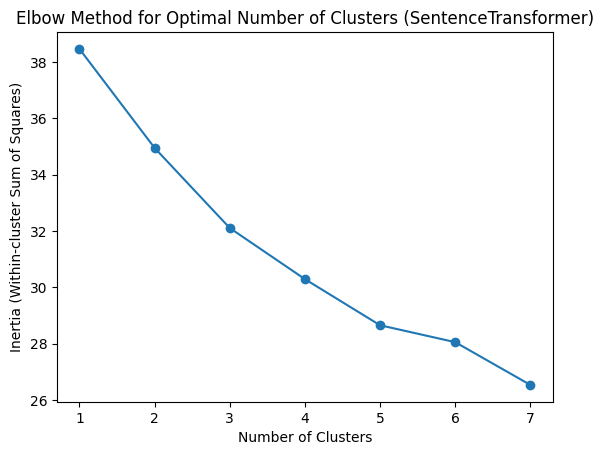

In [159]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Given embedding values
embedding_values = embeddings

# Define a range of cluster numbers to try (defining the maximum possible number of clusters)
max_clusters = 7  # You can adjust this range based on your data
inertia_values = []

# Perform K-means clustering for different cluster numbers
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embedding_values)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (SentenceTransformer)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()


In [114]:
import numpy as np
from sklearn.cluster import KMeans

# Given embedding values
embedding_values = embeddings

# Set the number of clusters (you can adjust this based on your requirements)
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embedding_values)

# Print the cluster labels for each sentence
for i, label in enumerate(cluster_labels):
    print(f"Sentence {i+1} belongs to Cluster {label+1}")



Sentence 1 belongs to Cluster 4
Sentence 2 belongs to Cluster 5
Sentence 3 belongs to Cluster 4
Sentence 4 belongs to Cluster 1
Sentence 5 belongs to Cluster 1
Sentence 6 belongs to Cluster 1
Sentence 7 belongs to Cluster 5
Sentence 8 belongs to Cluster 5
Sentence 9 belongs to Cluster 1
Sentence 10 belongs to Cluster 1
Sentence 11 belongs to Cluster 1
Sentence 12 belongs to Cluster 1
Sentence 13 belongs to Cluster 4
Sentence 14 belongs to Cluster 4
Sentence 15 belongs to Cluster 1
Sentence 16 belongs to Cluster 1
Sentence 17 belongs to Cluster 1
Sentence 18 belongs to Cluster 4
Sentence 19 belongs to Cluster 4
Sentence 20 belongs to Cluster 4
Sentence 21 belongs to Cluster 4
Sentence 22 belongs to Cluster 4
Sentence 23 belongs to Cluster 4
Sentence 24 belongs to Cluster 4
Sentence 25 belongs to Cluster 4
Sentence 26 belongs to Cluster 4
Sentence 27 belongs to Cluster 4
Sentence 28 belongs to Cluster 2
Sentence 29 belongs to Cluster 2
Sentence 30 belongs to Cluster 2
Sentence 31 belongs

C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


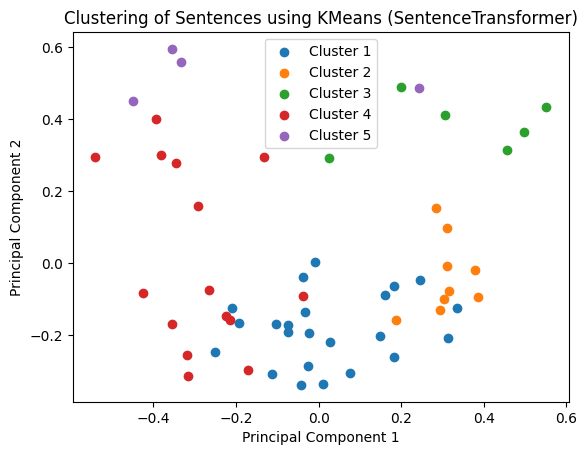

In [115]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform dimensionality reduction for visualization (you can adjust the number of components)
pca = PCA(n_components=2)
embedding_values_2d = pca.fit_transform(embedding_values)

# Plot the clustered sentences
for i in range(num_clusters):
    cluster_points = embedding_values_2d[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.title('Clustering of Sentences using KMeans (SentenceTransformer)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


2. Using KMedoids

In [157]:
import numpy as np
from sklearn_extra.cluster import KMedoids

# Given embedding values
embedding_values = embeddings

# Set the number of clusters (you can adjust this based on your requirements)
num_clusters = 5

# Perform K-medoids clustering
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)
# Note: KMedoids doesn't have a direct 'fit_predict' method like KMeans
cluster_labels_1 = kmedoids.fit(embedding_values).labels_

# Print the cluster labels for each sentence
for i, label in enumerate(cluster_labels_1):
   print(f"Sentence {i+1} belongs to Cluster {label+1}")


Sentence 1 belongs to Cluster 3
Sentence 2 belongs to Cluster 4
Sentence 3 belongs to Cluster 3
Sentence 4 belongs to Cluster 5
Sentence 5 belongs to Cluster 1
Sentence 6 belongs to Cluster 1
Sentence 7 belongs to Cluster 4
Sentence 8 belongs to Cluster 4
Sentence 9 belongs to Cluster 1
Sentence 10 belongs to Cluster 1
Sentence 11 belongs to Cluster 1
Sentence 12 belongs to Cluster 5
Sentence 13 belongs to Cluster 3
Sentence 14 belongs to Cluster 3
Sentence 15 belongs to Cluster 1
Sentence 16 belongs to Cluster 1
Sentence 17 belongs to Cluster 1
Sentence 18 belongs to Cluster 5
Sentence 19 belongs to Cluster 4
Sentence 20 belongs to Cluster 5
Sentence 21 belongs to Cluster 4
Sentence 22 belongs to Cluster 4
Sentence 23 belongs to Cluster 4
Sentence 24 belongs to Cluster 5
Sentence 25 belongs to Cluster 3
Sentence 26 belongs to Cluster 3
Sentence 27 belongs to Cluster 3
Sentence 28 belongs to Cluster 2
Sentence 29 belongs to Cluster 3
Sentence 30 belongs to Cluster 3
Sentence 31 belongs

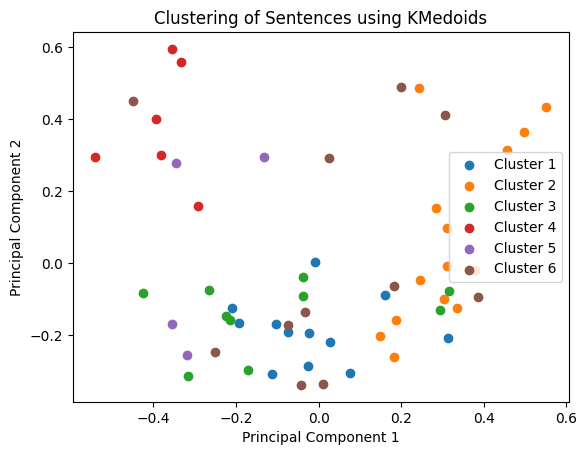

In [137]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform dimensionality reduction for visualization (you can adjust the number of components)
pca = PCA(n_components=2)
embedding_values_2d_1 = pca.fit_transform(embedding_values)

# Plot the clustered sentences using cluster_labels_1
for i in range(num_clusters):
  cluster_points = embedding_values_2d_1[cluster_labels_1 == i]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.title('Clustering of Sentences using KMedoids')  # Update title for clarity
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


3. Using Bisecting KMeans

In [138]:
import numpy as np
from sklearn.cluster import BisectingKMeans

# Given embedding values
embedding_values = embeddings

# Set the number of clusters (you can adjust this based on your requirements)
num_clusters = 6

# Perform Bisecting K-Means clustering
bkmeans = BisectingKMeans(n_clusters=num_clusters, random_state=42)
cluster_labels_2 = bkmeans.fit_predict(embedding_values)

# Print the cluster labels for each sentence
for i, label in enumerate(cluster_labels_2):
    print(f"Sentence {i+1} belongs to Cluster {label+1}")


Sentence 1 belongs to Cluster 2
Sentence 2 belongs to Cluster 2
Sentence 3 belongs to Cluster 2
Sentence 4 belongs to Cluster 4
Sentence 5 belongs to Cluster 4
Sentence 6 belongs to Cluster 4
Sentence 7 belongs to Cluster 2
Sentence 8 belongs to Cluster 2
Sentence 9 belongs to Cluster 4
Sentence 10 belongs to Cluster 4
Sentence 11 belongs to Cluster 4
Sentence 12 belongs to Cluster 4
Sentence 13 belongs to Cluster 2
Sentence 14 belongs to Cluster 2
Sentence 15 belongs to Cluster 5
Sentence 16 belongs to Cluster 4
Sentence 17 belongs to Cluster 5
Sentence 18 belongs to Cluster 1
Sentence 19 belongs to Cluster 2
Sentence 20 belongs to Cluster 2
Sentence 21 belongs to Cluster 2
Sentence 22 belongs to Cluster 2
Sentence 23 belongs to Cluster 2
Sentence 24 belongs to Cluster 2
Sentence 25 belongs to Cluster 2
Sentence 26 belongs to Cluster 2
Sentence 27 belongs to Cluster 4
Sentence 28 belongs to Cluster 3
Sentence 29 belongs to Cluster 3
Sentence 30 belongs to Cluster 3
Sentence 31 belongs

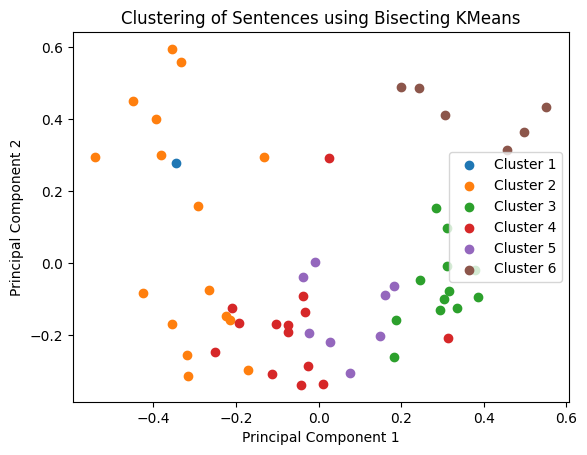

In [139]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform dimensionality reduction for visualization (you can adjust the number of components)
pca = PCA(n_components=2)
embedding_values_2d_2 = pca.fit_transform(embedding_values)

# Plot the clustered sentences using cluster_labels_2
for i in range(num_clusters):
  cluster_points = embedding_values_2d_2[cluster_labels_2 == i]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.title('Clustering of Sentences using Bisecting KMeans')  # Update title for clarity
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Performing clustering on the embeddings of the CBOW model

Using Kmeans

C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C

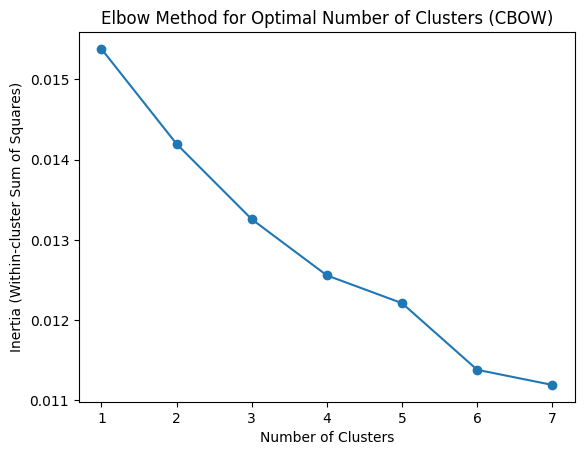

In [160]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Given embedding values
embedding_values_cbow = cbow_sentence_embeddings

# Define a range of cluster numbers to try (defining the maximum possible number of clusters)
max_clusters = 7  # You can adjust this range based on your data
inertia_values = []

# Perform K-means clustering for different cluster numbers
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embedding_values_cbow)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (CBOW)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()


In [141]:
import numpy as np
from sklearn.cluster import KMeans

# Given embedding values
embedding_values_cbow = cbow_sentence_embeddings

# Set the number of clusters (you can adjust this based on your requirements)
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels_cbow = kmeans.fit_predict(embedding_values_cbow)

# Print the cluster labels for each sentence
for i, label in enumerate(cluster_labels_cbow):
    print(f"Sentence {i+1} belongs to Cluster {label+1}")



Sentence 1 belongs to Cluster 2
Sentence 2 belongs to Cluster 1
Sentence 3 belongs to Cluster 2
Sentence 4 belongs to Cluster 4
Sentence 5 belongs to Cluster 1
Sentence 6 belongs to Cluster 1
Sentence 7 belongs to Cluster 1
Sentence 8 belongs to Cluster 2
Sentence 9 belongs to Cluster 4
Sentence 10 belongs to Cluster 4
Sentence 11 belongs to Cluster 4
Sentence 12 belongs to Cluster 4
Sentence 13 belongs to Cluster 4
Sentence 14 belongs to Cluster 4
Sentence 15 belongs to Cluster 2
Sentence 16 belongs to Cluster 4
Sentence 17 belongs to Cluster 4
Sentence 18 belongs to Cluster 2
Sentence 19 belongs to Cluster 4
Sentence 20 belongs to Cluster 1
Sentence 21 belongs to Cluster 1
Sentence 22 belongs to Cluster 2
Sentence 23 belongs to Cluster 2
Sentence 24 belongs to Cluster 1
Sentence 25 belongs to Cluster 4
Sentence 26 belongs to Cluster 4
Sentence 27 belongs to Cluster 2
Sentence 28 belongs to Cluster 2
Sentence 29 belongs to Cluster 2
Sentence 30 belongs to Cluster 4
Sentence 31 belongs

C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


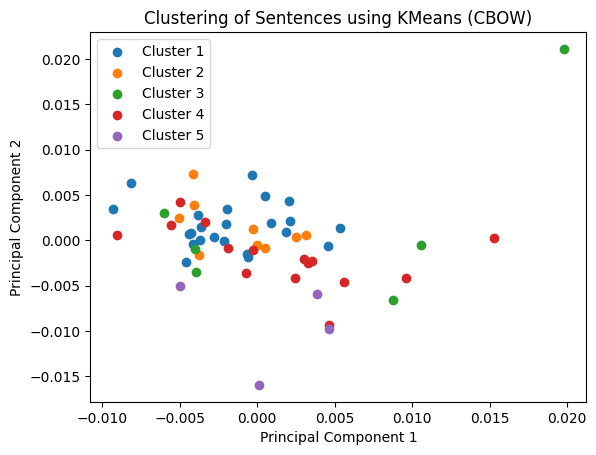

In [142]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform dimensionality reduction for visualization (you can adjust the number of components)
pca = PCA(n_components=2)
embedding_values_2d_cbow = pca.fit_transform(embedding_values_cbow)

# Plot the clustered sentences
for i in range(num_clusters):
    cluster_points = embedding_values_2d_cbow[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.title('Clustering of Sentences using KMeans (CBOW)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Performing clustering on the embeddings of the TF-IDF model

Using Kmeans

C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C

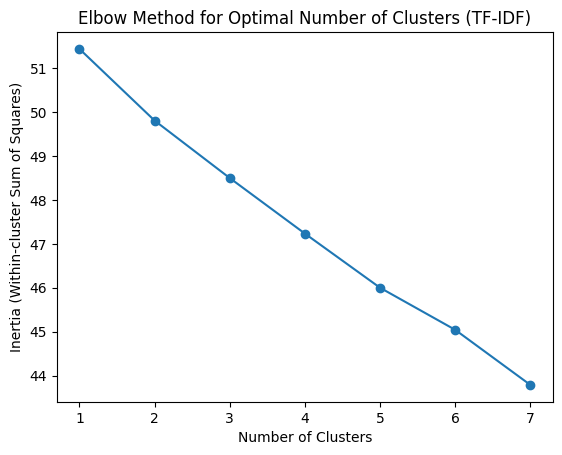

In [161]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Given embedding values
embedding_values_tf = tfidf_array

# Define a range of cluster numbers to try (defining the maximum possible number of clusters)
max_clusters = 7  # You can adjust this range based on your data
inertia_values = []

# Perform K-means clustering for different cluster numbers
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embedding_values_tf)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (TF-IDF)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()


In [144]:
import numpy as np
from sklearn.cluster import KMeans

# Given embedding values
embedding_values_tf = tfidf_array

# Set the number of clusters (you can adjust this based on your requirements)
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels_tf = kmeans.fit_predict(embedding_values_tf)

# Print the cluster labels for each sentence
for i, label in enumerate(cluster_labels_tf):
    print(f"Sentence {i+1} belongs to Cluster {label+1}")



Sentence 1 belongs to Cluster 3
Sentence 2 belongs to Cluster 4
Sentence 3 belongs to Cluster 3
Sentence 4 belongs to Cluster 5
Sentence 5 belongs to Cluster 4
Sentence 6 belongs to Cluster 2
Sentence 7 belongs to Cluster 3
Sentence 8 belongs to Cluster 4
Sentence 9 belongs to Cluster 4
Sentence 10 belongs to Cluster 4
Sentence 11 belongs to Cluster 5
Sentence 12 belongs to Cluster 5
Sentence 13 belongs to Cluster 2
Sentence 14 belongs to Cluster 4
Sentence 15 belongs to Cluster 5
Sentence 16 belongs to Cluster 5
Sentence 17 belongs to Cluster 5
Sentence 18 belongs to Cluster 4
Sentence 19 belongs to Cluster 2
Sentence 20 belongs to Cluster 3
Sentence 21 belongs to Cluster 2
Sentence 22 belongs to Cluster 3
Sentence 23 belongs to Cluster 3
Sentence 24 belongs to Cluster 3
Sentence 25 belongs to Cluster 3
Sentence 26 belongs to Cluster 5
Sentence 27 belongs to Cluster 1
Sentence 28 belongs to Cluster 2
Sentence 29 belongs to Cluster 1
Sentence 30 belongs to Cluster 2
Sentence 31 belongs

C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


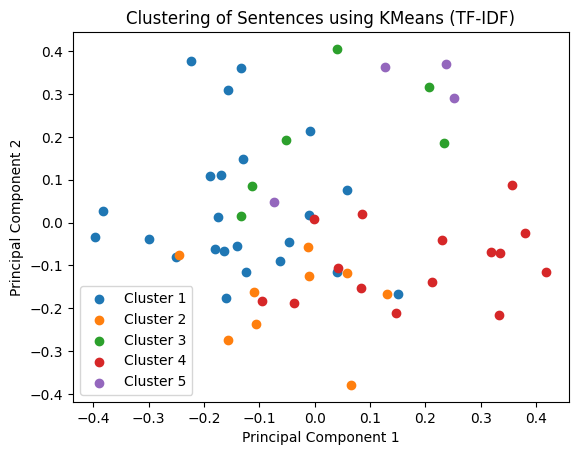

In [145]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform dimensionality reduction for visualization (you can adjust the number of components)
pca = PCA(n_components=2)
embedding_values_2d_tf = pca.fit_transform(embedding_values_tf)

# Plot the clustered sentences
for i in range(num_clusters):
    cluster_points = embedding_values_2d_tf[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.title('Clustering of Sentences using KMeans (TF-IDF)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Performing clustering on the embeddings of the FastText model

Using Kmeans

C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C

C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


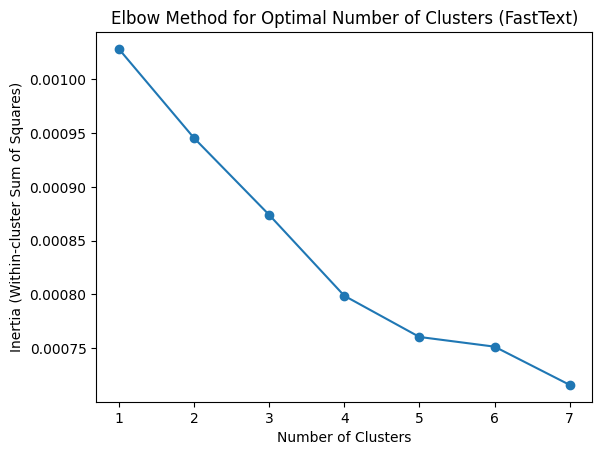

In [162]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Given embedding values
embedding_values_ft = ft_sentence_embeddings

# Define a range of cluster numbers to try (defining the maximum possible number of clusters)
max_clusters = 7  # You can adjust this range based on your data
inertia_values = []

# Perform K-means clustering for different cluster numbers
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embedding_values_ft)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (FastText)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()


In [147]:
import numpy as np
from sklearn.cluster import KMeans

# Given embedding values
embedding_values_ft = ft_sentence_embeddings

# Set the number of clusters (you can adjust this based on your requirements)
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels_ft = kmeans.fit_predict(embedding_values_ft)

# Print the cluster labels for each sentence
for i, label in enumerate(cluster_labels_ft):
    print(f"Sentence {i+1} belongs to Cluster {label+1}")



Sentence 1 belongs to Cluster 3
Sentence 2 belongs to Cluster 3
Sentence 3 belongs to Cluster 5
Sentence 4 belongs to Cluster 1
Sentence 5 belongs to Cluster 3
Sentence 6 belongs to Cluster 3
Sentence 7 belongs to Cluster 4
Sentence 8 belongs to Cluster 2
Sentence 9 belongs to Cluster 5
Sentence 10 belongs to Cluster 2
Sentence 11 belongs to Cluster 1
Sentence 12 belongs to Cluster 5
Sentence 13 belongs to Cluster 1
Sentence 14 belongs to Cluster 5
Sentence 15 belongs to Cluster 1
Sentence 16 belongs to Cluster 1
Sentence 17 belongs to Cluster 5
Sentence 18 belongs to Cluster 5
Sentence 19 belongs to Cluster 2
Sentence 20 belongs to Cluster 5
Sentence 21 belongs to Cluster 3
Sentence 22 belongs to Cluster 3
Sentence 23 belongs to Cluster 5
Sentence 24 belongs to Cluster 3
Sentence 25 belongs to Cluster 5
Sentence 26 belongs to Cluster 1
Sentence 27 belongs to Cluster 5
Sentence 28 belongs to Cluster 1
Sentence 29 belongs to Cluster 5
Sentence 30 belongs to Cluster 1
Sentence 31 belongs

C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


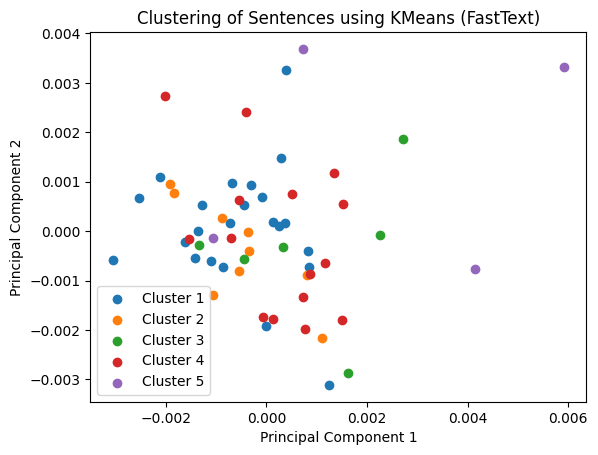

In [148]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform dimensionality reduction for visualization (you can adjust the number of components)
pca = PCA(n_components=2)
embedding_values_2d_ft = pca.fit_transform(embedding_values_ft)

# Plot the clustered sentences
for i in range(num_clusters):
    cluster_points = embedding_values_2d_ft[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.title('Clustering of Sentences using KMeans (FastText)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Storing the sentences of every cluster in a dictionary

### TF-IDF

In [149]:
# Create a dictionary to store sentences for each cluster
cluster_dict_tf = {i: [] for i in range(num_clusters)}

# Populate the dictionary with sentences
for i, label in enumerate(cluster_labels_tf):
    cluster_dict_tf[label].append(sentences[i])
cluster_dict_tf

{0: ['This is called metastasis.Cancers that have metastasized are considered more advanced than those that have not.',
  'Surgery is often used in combination with some other therapy in order to make sure all of the cancer cells are gone.Chemotherapy is a form of aggressive cancer treatment that uses medications that are toxic to cells to kill rapidly dividing cancer cells.',
  'Radiation therapy done inside of your body is called brachytherapy, while radiation therapy done outside of your body is called external beam radiation.This treatment repairs diseased bone marrow with healthy stem cells.',
  'Stem cells are undifferentiated cells that can have a variety of functions.',
  'A stem cell transplant is commonly used to treat leukemia.Immunotherapy uses your body’s own immune system to attack cancer cells.',
  'This increases your chances of catching any possible cancers as early as possible.Cancer is a group of serious diseases that are caused by genetic changes in your cells.'],
 

### CBOW

In [150]:
# Create a dictionary to store sentences for each cluster
cluster_dict_cbow = {i: [] for i in range(num_clusters)}

# Populate the dictionary with sentences
for i, label in enumerate(cluster_labels_cbow):
    cluster_dict_cbow[label].append(sentences[i])
cluster_dict_cbow

{0: ['You can inherit mutations or develop them due to environmental factors.',
  'According to the World Health Organization (WHO), cancer accounted for almost 1 in 6 deaths in 2020.',
  'Experts are working hard to test out new cancer treatments every day.The main cause of cancer is mutations, or changes to the DNA in your cells.',
  'Genetic mutations can be inherited.',
  'As cells become damaged or die off, new cells take their place.Cancer disrupts this process and causes cells to grow abnormally.',
  'It’s caused by changes or mutations in the cell’s DNA.The DNA in each cell has instructions that tell the cell what to do and how to grow and divide.',
  'These extra cells can divide uncontrollably, causing tumors to form.Tumors can cause health problems, depending on where they grow in the body.Not all tumors are cancerous.',
  'A stem cell transplant is commonly used to treat leukemia.Immunotherapy uses your body’s own immune system to attack cancer cells.',
  'These therapies h

### FastText

In [151]:
# Create a dictionary to store sentences for each cluster
cluster_dict_ft = {i: [] for i in range(num_clusters)}

# Populate the dictionary with sentences
for i, label in enumerate(cluster_labels_ft):
    cluster_dict_ft[label].append(sentences[i])

cluster_dict_ft

{0: ['They may also disrupt the body’s regular function.Cancer is one of the leading causes of death in the world.',
  'In general, the risk of developing cancer appears to increase until the age of 70 to 80 and then diminish, according to the National Cancer Institute (NCI).',
  'An example is ulcerative colitis, a chronic inflammatory bowel disease.Cancers are named for the area in which they begin and the type of cell they are made of, even if they spread to other parts of the body.',
  'There are also several clinical terms used for certain general types of cancer:Learn more about specific types of cancer with the resources below.Early detection is when cancer is found in its early stages.',
  'This can increase the effectiveness of treatment and lower the mortality rate.Cancer screenings may help detect signs of cancer early.',
  'Malignant tumors are cancerous and can invade other parts of the body.Some cancer cells can also spread through the bloodstream or lymphatic system to d

### SentenceTransformer

In [152]:
# Create a dictionary to store sentences for each cluster
cluster_dict = {i: [] for i in range(num_clusters)}

# Populate the dictionary with sentences
for i, label in enumerate(cluster_labels):
    cluster_dict[label].append(sentences[i])

cluster_dict

{0: ['They may also disrupt the body’s regular function.Cancer is one of the leading causes of death in the world.',
  'According to the World Health Organization (WHO), cancer accounted for almost 1 in 6 deaths in 2020.',
  'Experts are working hard to test out new cancer treatments every day.The main cause of cancer is mutations, or changes to the DNA in your cells.',
  'These external causes, called carcinogens, can include:According to the WHO, about 33 percent of cancer deaths may be caused by tobacco, alcohol, high body mass index (BMI), low fruit and vegetable consumption, and not getting enough physical activity.Certain risk factors may increase your chance of developing cancer.',
  'These risk factors can include:The risk of developing cancer also increases with age.',
  'In general, the risk of developing cancer appears to increase until the age of 70 to 80 and then diminish, according to the National Cancer Institute (NCI).',
  'A 2020 review suggests this may be the result 

In [158]:
# Create a dictionary to store sentences for each cluster for KMedoids
cluster_dict_1 = {i: [] for i in range(num_clusters)}

# Populate the dictionary with sentences
for i, label in enumerate(cluster_labels_1):
    cluster_dict_1[label].append(sentences[i])

cluster_dict_1

{0: ['According to the World Health Organization (WHO), cancer accounted for almost 1 in 6 deaths in 2020.',
  'Experts are working hard to test out new cancer treatments every day.The main cause of cancer is mutations, or changes to the DNA in your cells.',
  'These external causes, called carcinogens, can include:According to the WHO, about 33 percent of cancer deaths may be caused by tobacco, alcohol, high body mass index (BMI), low fruit and vegetable consumption, and not getting enough physical activity.Certain risk factors may increase your chance of developing cancer.',
  'These risk factors can include:The risk of developing cancer also increases with age.',
  'In general, the risk of developing cancer appears to increase until the age of 70 to 80 and then diminish, according to the National Cancer Institute (NCI).',
  'There are also several clinical terms used for certain general types of cancer:Learn more about specific types of cancer with the resources below.Early detectio

In [65]:
# Create a dictionary to store sentences for each cluster for Bisecting KMeans
cluster_dict_2 = {i: [] for i in range(num_clusters)}

# Populate the dictionary with sentences
for i, label in enumerate(cluster_labels_2):
    cluster_dict_2[label].append(sentences[i])

cluster_dict_2

{0: ['If you are experiencing unexplainable symptoms, it is best to contact a doctor for a diagnosis.Normal cells in your body grow and divide.'],
 1: ['Cancer occurs when genetic mutations in abnormal cells cause them to divide rapidly.',
  'You can inherit mutations or develop them due to environmental factors.',
  'Cancer is a large group of diseases that occur when abnormal cells divide rapidly and can spread to other tissue and organs.These rapidly growing cells may cause tumors.',
  'Genetic mutations can be inherited.',
  'They can also occur after birth as a result of environmental forces.',
  'An example is ulcerative colitis, a chronic inflammatory bowel disease.Cancers are named for the area in which they begin and the type of cell they are made of, even if they spread to other parts of the body.',
  'For example, a cancer that begins in the lungs and spreads to the liver is still called lung cancer.',
  'Each one has a life cycle determined by the type of cell.',
  'As cell

In [66]:
# Write the dictionary to a file
output_file_path = 'model_output.txt'

with open(output_file_path, 'w') as output_file:
    for cluster_num, sentences in cluster_dict.items():
        output_file.write(f"Cluster {cluster_num+1} sentences: {sentences}\n\n")

print(f"Output written to {output_file_path}")


Output written to model_output.txt


# Models for abstractive summarization

1. Using BART

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

In [ ]:
import textwrap

def text_summarizer(input_text):
    model_name = "facebook/bart-large-cnn"
    model = BartForConditionalGeneration.from_pretrained(model_name)
    tokenizer = BartTokenizer.from_pretrained(model_name)

    inputs = tokenizer.encode("summarize: " + input_text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=100, length_penalty=1.0, num_beams=6, early_stopping=False)

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    formatted_summary = "\n".join(textwrap.wrap(summary, width=80))
    return formatted_summary

# Example usage:

# bart_summary = text_summarizer(single_string)

# with open('bart_output.txt', 'w') as file:
#     file.write(bart_summary)

# print(bart_summary)


Summarizing each cluster using the model and storing the results in a text file

In [ ]:
# Open the output file in 'w' mode to overwrite previous content
with open("final_summary_bart.txt", "w") as f:
    # Iterate over each cluster
    for i, (cluster, sentences) in enumerate(cluster_dict.items(), 1):
        # Write cluster heading
        f.write(f"Cluster {i}:\n\n")
        
        # Concatenate sentences into a single string
        concatenated_text = ' '.join(sentences)
        
        # Generate summary
        summary = text_summarizer(concatenated_text)
        
        # Write summary to file
        f.write(summary)
        
        # Add some spacing between clusters
        f.write("\n\n")

        print(f"Summary for {cluster} has been saved.")

print("Summaries for all clusters have been saved to 'final_summary_bart.txt'")


Summary for 0 has been saved.
Summary for 1 has been saved.
Summary for 2 has been saved.
Summary for 3 has been saved.
Summary for 4 has been saved.
Summary for 5 has been saved.
Summaries for all clusters have been saved to 'final_summary_bart.txt'


2. Using T5

In [ ]:
import textwrap
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

def t5_text_summarizer(input_text):
    model_name = "google-t5/t5-base"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    inputs = tokenizer.encode("summarize: " + input_text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=100, length_penalty=1.0, num_beams=6, early_stopping=False)

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    formatted_summary = "\n".join(textwrap.wrap(summary, width=80))
    return formatted_summary

# Example usage:

# t5_summary = t5_text_summarizer(single_string)

# with open('t5_output.txt', 'w') as file:
#     file.write(t5_summary)

# print(t5_summary)


In [ ]:
# Open the output file in 'w' mode to overwrite previous content
with open("final_summary_t5(2).txt", "w") as f:
    # Iterate over each cluster
    for i, (cluster, sentences) in enumerate(cluster_dict.items(), 1):
        # Write cluster heading
        f.write(f"Cluster {i}:\n\n")
        
        # Concatenate sentences into a single string
        concatenated_text = ' '.join(sentences)
        
        # Generate summary
        summary = t5_text_summarizer(concatenated_text)
        
        # Write summary to file
        f.write(summary)
        
        # Add some spacing between clusters
        f.write("\n\n")

        print(f"Summary for {cluster} has been saved.")

print("Summaries for all clusters have been saved to 'final_summary_t5(2).txt'")

C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\transformers\models\t5\tokenization_t5_fast.py:171: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on google-t5/t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Summary for 0 has been saved.
Summary for 1 has been saved.
Summary for 2 has been saved.
Summary for 3 has been saved.
Summary for 4 has been saved.
Summary for 5 has been saved.
Summaries for all clusters have been saved to 'final_summary_t5(2).txt'


3. Using Pegasus

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/pegasus-cnn_dailymail")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-cnn_dailymail")

C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import textwrap
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

def pegasus_text_summarizer(input_text):
    model_name = "google/pegasus-cnn_dailymail"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    inputs = tokenizer.encode("summarize: " + input_text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=100, length_penalty=1.0, num_beams=6, early_stopping=False)

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    formatted_summary = "\n".join(textwrap.wrap(summary, width=80))
    return formatted_summary

In [ ]:
# Open the output file in 'w' mode to overwrite previous content
with open("final_summary_pegasus.txt", "w") as f:
    # Iterate over each cluster
    for i, (cluster, sentences) in enumerate(cluster_dict.items(), 1):
        # Write cluster heading
        f.write(f"Cluster {i}:\n\n")
        
        # Concatenate sentences into a single string
        concatenated_text = ' '.join(sentences)
        
        # Generate summary
        summary = pegasus_text_summarizer(concatenated_text)
        
        # Write summary to file
        f.write(summary)
        
        # Add some spacing between clusters
        f.write("\n\n")

        print(f"Summary for {cluster} has been saved.")

print("Summaries for all clusters have been saved to 'final_summary_pegasus.txt'")

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary for 0 has been saved.


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary for 1 has been saved.


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary for 2 has been saved.


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary for 3 has been saved.


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary for 4 has been saved.


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary for 5 has been saved.
Summaries for all clusters have been saved to 'final_summary_pegasus.txt'


# Outputs:

# BART Summary:
Cluster 1:

Cancer is one of the leading causes of death in the world. About 33 percent of
cancer deaths may be caused by tobacco, alcohol, high body mass index (BMI), low
fruit and vegetable consumption, and not getting enough physical activity.
Certain risk factors may increase your chance of developing cancer. Early
detection is when cancer is found in its early stages. This can increase the
effectiveness of treatment and lower the mortality rate. Screenings may help
detect cancer early when it is easier to treat. The treatment plan and outlook
for people with cancer can depend on the type of cancer, the stage at which it
is diagnosed, and their age and general health.

Cluster 2:

Cancer treatment can include different options, depending on the type of cancer
and how advanced it is. Surgery is often used in combination with some other
therapy in order to make sure all of the cancer cells are gone. Chemotherapy is
a form of aggressive cancer treatment that uses medications that are toxic to
cells. Immunotherapy uses your body s own immune system to attack cancer cells.
Hormone therapy removes or blocks hormones that fuel certain cancers to stop
cancer cells from growing. Targeted drug therapy uses drugs to interfere with
certain molecules that help cancer cells grow and survive.

Cluster 3:

Clinical trials can offer another option for people who may have not seen the
level of success they wanted with conventional treatments. This may include
testing the effectiveness of drugs that have already been approved by the Food
and Drug Administration (FDA) It can also include trying new drugs. In some
cases, this treatment may be provided for free. If you are interested in this
kind of therapy, find clinical trials near you. For confidential support call
the Samaritans on 08457 90 90 90 or visit a local Samaritans branch, see
www.samaritans.org for details.

Cluster 4:

Cancers are named for the area in which they begin and the type of cell they are
made of, even if they spread to other parts of the body. A cancer that begins in
the lungs and spreads to the liver is still called lung cancer. Not all tumors
are cancerous. Benign tumors are noncancerous and do not spread to nearby
tissues. But sometimes, tumors can grow large and cause problems when they press
against neighboring organs and tissue. If you are experiencing unexplainable
symptoms, it is best to contact a doctor for a diagnosis.

Cluster 5:

You can inherit mutations or develop them due to environmental factors. Genetic
mutations can be inherited. They can also occur after birth as a result of
environmental forces. Genetic testing may reveal if you are eligible for this
type of therapy. For confidential support call the Samaritans in the UK on 08457
90 90 90, visit a local Samaritans branch or see www.samaritans.org for details.
In the U.S. call the National Suicide Prevention Line on 1-800-273-8255.

# Pegasus Summary:
Cluster 1:

According to the World Health Organization (WHO), cancer accounted for almost 1
in 6 deaths in 2020.<n>Certain risk factors may increase your chance of
developing cancer.<n>Risk factors like smoking, drinking alcohol, a lack of
physical activity, having a high BMI, and catching certain viruses and bacteria
may contribute to developing cancer.<n>The treatment plan and outlook for people
with cancer can depend on the type of cancer, the stage at which it is
diagnosed, and their age and general health.

Cluster 2:

The most common types of treatment are:Surgery removes as much of the cancer as
possible.<n>Chemotherapy is a form of aggressive cancer treatment that uses
medications that are toxic to cells to kill rapidly dividing cancer
cells.<n>Radiation therapy uses powerful, focused beams of radiation to kill
cancer cells.<n>Hormone therapy removes or blocks hormones that fuel certain
cancers to stop cancer cells from growing.<n>Targeted drug therapy uses drugs to
interfere with certain molecules that help cancer cells grow and survive.

Cluster 3:

Clinical trials can offer another option for people who may have not seen the
level of success they wanted with conventional treatments.<n>In some cases, this
treatment may be provided for free.<n>Alternative medicine may be used to
complement another form of treatment. Not quite, but new treatments could change
that.<n>Life threatening complications can also occur due to malnutrition, a
weakened immune...Dr.<n>Dr. Sanjay Gupta is a medical doctor who practices in
San Francisco, California. He can be reached at: 415-337-3883.

Cluster 4:

Cancer is a large group of diseases that occur when abnormal cells divide
rapidly and can spread to other tissue and organs.<n>Cancers are named for the
area in which they begin and the type of cell they are made of, even if they
spread to other parts of the body.<n> Benign tumors are noncancerous and do not
spread to nearby tissues.But sometimes, tumors can grow large and cause problems
when they press against neighboring organs and tissue.<n>Malignant tumors are
cancerous and can invade other parts of the body.

Cluster 5:

Genetic mutations can be inherited. They can also occur after birth as a result
of environmental forces.<n>Genetic testing may reveal if you are eligible for
this type of therapy.<n>You can inherit mutations or develop them due to
environmental factors.<n>Genetic mutations can be inherited. They can also occur
after birth as a result of environmental forces.<n>You can be eligible for this
type of therapy if you have a family history of genetic mutations.<n>You can
inherit mutations or develop them due to environmental factors.



# T5 Summary:
Cluster 1:

the main cause of cancer is mutations, or changes to the DNA in your cells.
these external causes, called carcinogens, can include: tobacco, alcohol, high
body mass index (bmi), low fruit and vegetable consumption, and not getting
enough physical activity. a 2020 review suggests this may be the result of:Some
existing health conditions that cause inflammation may also increase your risk
of developing cancer. early detection is when cancer is found in its early
stages.

Cluster 2:

cancer treatment can include different options depending on the type of cancer
and how advanced it is.Surgery removes as much of the cancer as possible.
chemotherapy is a form of aggressive cancer treatment that uses medications that
are toxic to cells to kill rapidly dividing cancer cells. radiation therapy done
inside of your body is called brachytherapy, while radiation therapy done
outside of your body is called external beam radiation. a stem cell transplant
is commonly used to treat leukemia.

Cluster 3:

clinical trials can offer another option for people who may have not seen the
level of success they wanted with conventional treatments. in some cases, this
treatment may be provided for free. life threatening complications can also
occur due to malnutrition, a weakened immune system. if you are interested in
this kind of therapy, find clinical trials near you. if you are interested in
this kind of therapy, find clinical trials near you. if you are interested in
this kind of therapy, find clinical trials near you.

Cluster 4:

cancer is a large group of diseases that occur when abnormal cells divide
rapidly and can spread to other tissue and organs. an example is ulcerative
colitis, a chronic inflammatory bowel disease.Cancers are named for the area in
which they begin and the type of cell they are made of, even if they spread to
other parts of the body. a cancer that begins in the lungs and spreads to the
liver is still called lung cancer.

Cluster 5:

mutations can be inherited or developed due to environmental factors. they can
also occur after birth as a result of environmental forces. genetic testing may
reveal if you are eligible for this type of therapy. a genetic test may reveal
if you are eligible for this type of therapy. a genetic test may reveal if you
are eligible for this type of therapy. a genetic test may reveal if you are
eligible for this type of therapy. a genetic test may reveal if you are eligible
for this type of therapy
